# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.3/12.8 MB 2.6 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.2 MB/s eta 0:00:06
     ----- ---------------------------------- 1.8/12.8 MB 2.0 MB/s eta 0:00:06
     ------ --------------------------------- 2.1/12.8 MB 1.8 MB/s eta 0:00:06
     ------ --------------------------------- 2.1/12.8 MB 1.8 MB/s eta 0:00:06
     ------- -------------------------------- 2.4/12.8 MB 1.5 MB/s eta 0:00:07
     --------- ------------------------------ 2.9/12.8 MB 1.5 MB/s eta 0:00:07
     --------- ------------------------------ 3.1/12.8 MB 1.5 MB/s eta 0:00:07
     ----------- ---------------------------- 3.7/12.8 MB 1.6 MB/s eta 0:00:06
     ------------- -------------------------- 4.2/12.8 MB 1

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
True_df= pd.read_csv('True.csv')
# Import the second file - Fake.csv
Fake_df= pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
True_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [6]:
True_df.describe()

title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text                date  
count                                               21417               21417  
unique                                              21192                 716  
top     (Reuters) - Highlights for U.S. President Dona...  December 20, 2017   
freq                                                    8                 182

In [7]:
True_df.isnull().sum()

title    0
text     0
date     0
dtype: int64

In [8]:
# Inspect the DataFrame with Fake News to understand the given data
Fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [9]:
Fake_df.describe()

title   text          date
count                                               23502  23502         23481
unique                                              17914  17466          1692
top     MEDIA IGNORES Time That Bill Clinton FIRED His...         May 10, 2017
freq                                                    6    626            46

In [10]:
Fake_df.isnull().sum()

title    21
text     21
date     42
dtype: int64

In [11]:
# Print the column details for True News DataFrame
True_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [12]:
True_df.shape

(21417, 3)

In [13]:
# Print the column details for Fake News Dataframe
Fake_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [14]:
Fake_df.shape

(23523, 3)

In [15]:
# Print the column names of both DataFrames
True_df.keys()

Index(['title', 'text', 'date'], dtype='object')

In [16]:
Fake_df.keys()

Index(['title', 'text', 'date'], dtype='object')

In [17]:
True_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [18]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
True_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
Fake_df['news_label'] = 0

In [19]:
True_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

In [20]:
Fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  \
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017   
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017   
2  On Friday, it was revealed that former Milwauk...  December 30, 2017   
3  On Christmas day, Donald Trump announced that ...  December 29, 2017   
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017   

   news_label  
0           0  
1           0  
2           0  
3           0  
4           0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [21]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([True_df, Fake_df], ignore_index=True)

In [22]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

In [23]:
df.shape

(44940, 4)

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [24]:
# Check Presence of Null Values
df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [25]:
# Handle Rows with Null Values
df=df[~df['title'].isnull()]
df.isnull().sum()

title          0
text           0
date          21
news_label     0
dtype: int64

In [26]:
df=df[~df['date'].isnull()]

In [27]:
df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [28]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title'] + ' ' + df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
df.drop('title',axis=1,inplace=True)
df.drop('text',axis=1,inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
df.head()

date  news_label  \
0  December 31, 2017            1   
1  December 29, 2017            1   
2  December 31, 2017            1   
3  December 30, 2017            1   
4  December 29, 2017            1   

                                           news_text  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [29]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rituparna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Rituparna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [30]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [31]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match



In [32]:
def lemmatize_text_with_pos(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    pos_tags = nltk.pos_tag(tokens)  # Get POS tags
    
    lemmatized_words = []
    for word, tag in pos_tags:
        wordnet_tag = get_wordnet_pos(tag)
        lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_tag)
        lemmatized_words.append(lemmatized_word)
        
    return ' '.join(lemmatized_words)

In [33]:
df['clean_news_text'] = df['news_text'].progress_apply(clean_text)
df['lemmatized_news_text'] = df['clean_news_text'].progress_apply(lemmatize_text_with_pos)

100%|███████████████████████████████████████████████████████████████████████████████████████| 44898/44898 [2:47:34<00:00,  4.47it/s]


In [34]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = df[['clean_news_text', 'lemmatized_news_text']].copy()
# Add 'news_label' column to the new dataframe for topic identification
df_clean=df[['clean_news_text', 'lemmatized_news_text', 'news_label']].copy()


In [35]:
df_clean.head()

clean_news_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                lemmatized_news_text  news_label  
0  a u budget fight loom republican flip their fi...           1  
1  u military to accept transgender recruit on mo...           1  
2  senior u republican senator let mr mueller do ...           1  
3  fbi russia probe help by australian diplomat t...           1  
4  trump want postal service to charge much more ...           1

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [36]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
# Convert to lower case
 text = text.lower()
# Remove text in square brackets
 text = re.sub('\[.*?\]', '', text)
# Remove punctuation
 text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
# Remove words with numbers
 text = re.sub('\w*\d\w*', '', text)
 return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [37]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_news_text_column'] = df_clean['clean_news_text'].apply(clean_text)

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [38]:
try:
    nltk.data.find('corpora/wordnet')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('wordnet')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('punkt')
    nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rituparna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rituparna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rituparna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rituparna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from nltk.corpus import stopwords

In [40]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def process_text_for_nouns(text):
   
    # 1. Initialize lemmatizer and stopword set
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # 2. Tokenize the text
    tokens = word_tokenize(text)
    
    # 3. Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    
    processed_words = []
    # 4. Filter, remove stopwords, and lemmatize
    for word, tag in tagged_tokens:
        # Check if the tag is for a singular or plural noun
        if tag.startswith('NN'):
            # Check if the word is not a stopword
            if word.lower() not in stop_words:
                # Lemmatize the word as a noun
                lemma = lemmatizer.lemmatize(word, pos=wordnet.NOUN)
                processed_words.append(lemma)
                
    # 5. Join the words back into a single string
    return ' '.join(processed_words)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [41]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['clean_news_text_NN'] = df_clean['cleaned_news_text_column'].progress_apply(process_text_for_nouns)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 44898/44898 [16:45<00:00, 44.65it/s]


### Save the Cleaned data as a csv file (Recommended)

In [42]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)


In [43]:
df_clean = pd.read_csv("clean_df.csv")

In [44]:
# Check the first few rows of the DataFrame
df_clean.head()

clean_news_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                lemmatized_news_text  news_label  \
0  a u budget fight loom republican flip their fi...           1   
1  u military to accept transgender recruit on mo...           1   
2  senior u republican senator let mr mueller do ...           1   
3  fbi russia probe help by australian diplomat t...           1   
4  trump want postal service to charge much more ...           1   

                            cleaned_news_text_column  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                  clean_news_text_NN  
0  budget fight republican script washington head...  
1  transgender recruit monday washington reuters ...  
2  senator mr job washington counsel investigatio...  
3  fbi russia probe diplomat tipoff washington re...  
4  trump service amazon shipment reuters presiden...

In [45]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 5)

In [46]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   clean_news_text           44898 non-null  object
 1   lemmatized_news_text      44898 non-null  object
 2   news_label                44898 non-null  int64 
 3   cleaned_news_text_column  44898 non-null  object
 4   clean_news_text_NN        44898 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [47]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_clean, test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [48]:
df_clean.head()

clean_news_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                lemmatized_news_text  news_label  \
0  a u budget fight loom republican flip their fi...           1   
1  u military to accept transgender recruit on mo...           1   
2  senior u republican senator let mr mueller do ...           1   
3  fbi russia probe help by australian diplomat t...           1   
4  trump want postal service to charge much more ...           1   

                            cleaned_news_text_column  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                  clean_news_text_NN  
0  budget fight republican script washington head...  
1  transgender recruit monday washington reuters ...  
2  senator mr job washington counsel investigatio...  
3  fbi russia probe diplomat tipoff washington re...  
4  trump service amazon shipment reuters presiden...

In [49]:
# Add a new column to calculate the character length of cleaned news text
df_train['clean_news_char_length'] = df_train['cleaned_news_text_column'].str.len()
df_test['clean_news_char_length'] = df_test['cleaned_news_text_column'].str.len()
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_train['lemmatized_char_length'] = df_train['clean_news_text_NN'].str.len()
df_test['lemmatized_char_length'] = df_test['clean_news_text_NN'].str.len()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [50]:
df_train.head()

clean_news_text  \
13970  irish pms party says government deal dead if o...   
41668  breaking kansas city police captain shot dead ...   
26810   gop megadonor sheldon adelson refused ted cru...   
30967  wow latino group aired terrorlike tv ad only d...   
26072   sam bee dismantles the media for letting trum...   

                                    lemmatized_news_text  news_label  \
13970  irish pm party say government deal dead if opp...           1   
41668  break kansas city police captain shoot dead by...           0   
26810  gop megadonor sheldon adelson refuse ted cruz ...           0   
30967  wow latino group air terrorlike tv ad only day...           0   
26072  sam bee dismantle the medium for let trump be ...           0   

                                cleaned_news_text_column  \
13970  irish pms party says government deal dead if o...   
41668  breaking kansas city police captain shot dead ...   
26810   gop megadonor sheldon adelson refused ted cru...   
30967  wow latino group aired terrorlike tv ad only d...   
26072   sam bee dismantles the media for letting trum...   

                                      clean_news_text_NN  \
13970  pm party government deal opposition submits co...   
41668  city police shooter president spending time be...   
26810  gop adelson visit piece sht cruz piece country...   
30967  wow latino group tv ad day man muslim minority...   
26072  sam bee medium trump raging liar news medium n...   

       clean_news_char_length  lemmatized_char_length  
13970                     611                     287  
41668                    2405                     835  
26810                    3188                    1078  
30967                    3268                    1281  
26072                    2434                     695

In [51]:
# Create a histogram plot to visualise character lengths

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Add histogram for cleaned news text
axes[0].hist(df_train['clean_news_char_length'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Cleaned news Text Character Lengths', fontsize=14)
axes[0].set_xlabel('Character Length', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add histogram for lemmatized news text with POS tags removed
axes[1].hist(df_train['lemmatized_char_length'], bins=50, color='skyblue', edgecolor='black')
axes[1].set_title('Distribution of Lemmatized Text Character Lengths', fontsize=14)
axes[1].set_xlabel('Character Length', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


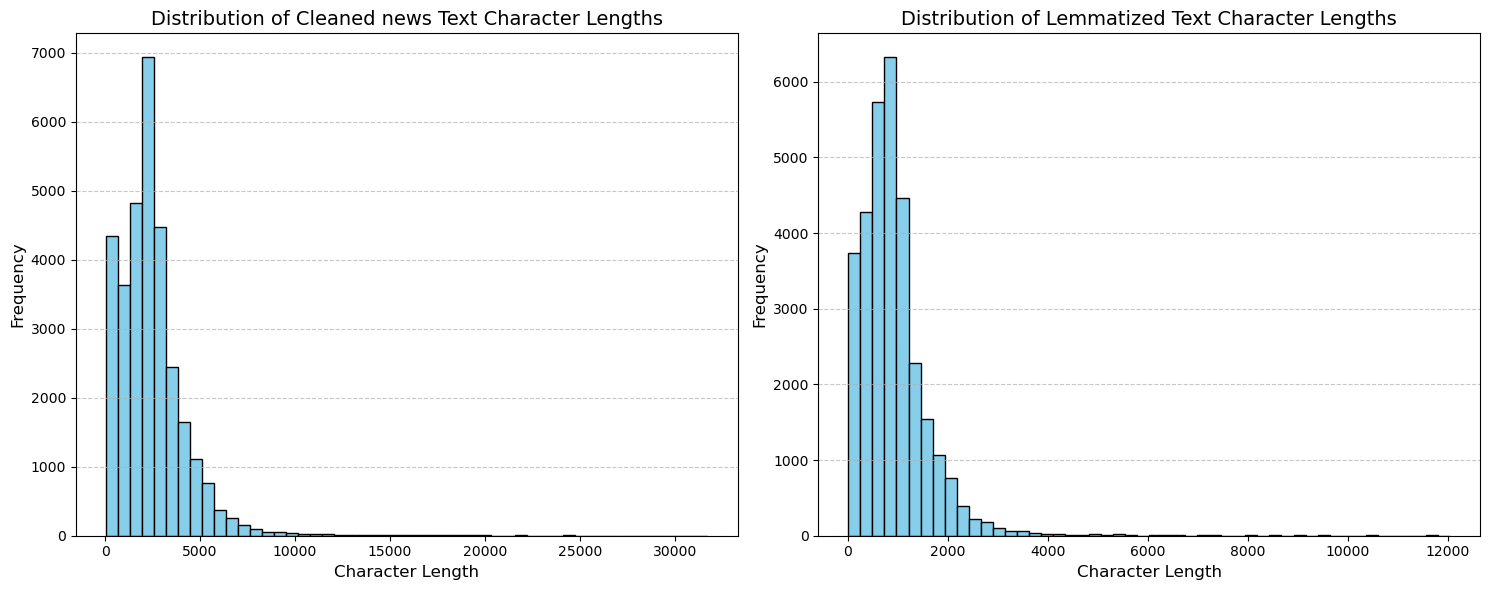

In [52]:
plt.tight_layout()

# Display the plot
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [53]:
df_train.head()

clean_news_text  \
13970  irish pms party says government deal dead if o...   
41668  breaking kansas city police captain shot dead ...   
26810   gop megadonor sheldon adelson refused ted cru...   
30967  wow latino group aired terrorlike tv ad only d...   
26072   sam bee dismantles the media for letting trum...   

                                    lemmatized_news_text  news_label  \
13970  irish pm party say government deal dead if opp...           1   
41668  break kansas city police captain shoot dead by...           0   
26810  gop megadonor sheldon adelson refuse ted cruz ...           0   
30967  wow latino group air terrorlike tv ad only day...           0   
26072  sam bee dismantle the medium for let trump be ...           0   

                                cleaned_news_text_column  \
13970  irish pms party says government deal dead if o...   
41668  breaking kansas city police captain shot dead ...   
26810   gop megadonor sheldon adelson refused ted cru...   
30967  wow latino group aired terrorlike tv ad only d...   
26072   sam bee dismantles the media for letting trum...   

                                      clean_news_text_NN  \
13970  pm party government deal opposition submits co...   
41668  city police shooter president spending time be...   
26810  gop adelson visit piece sht cruz piece country...   
30967  wow latino group tv ad day man muslim minority...   
26072  sam bee medium trump raging liar news medium n...   

       clean_news_char_length  lemmatized_char_length  
13970                     611                     287  
41668                    2405                     835  
26810                    3188                    1078  
30967                    3268                    1281  
26072                    2434                     695

In [54]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
df_true_news = df_train[df_train['news_label'] == 1]
df_true_news['clean_news_text_NN'] = df_true_news['clean_news_text_NN'].astype(str)
true_text = " ".join(df_true_news['clean_news_text_NN'])
# Generate word cloud for True News
wordcloud_true = WordCloud(max_words=40, background_color="white", width=800, height=400).generate(true_text)

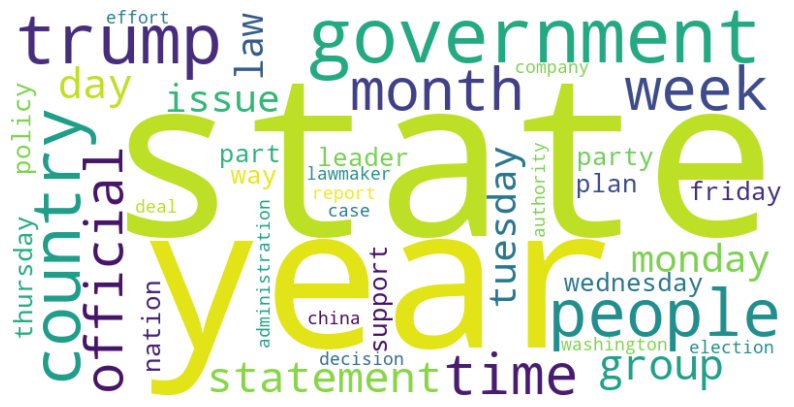

In [55]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.axis("off")
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [56]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
df_fake_news = df_train[df_train['news_label'] == 0]
df_fake_news['clean_news_text_NN'] = df_fake_news['clean_news_text_NN'].astype(str)
fake_text = " ".join(df_fake_news['clean_news_text_NN'])
# Generate word cloud for Fake News
wordcloud_fake = WordCloud(max_words=40, background_color="white").generate(fake_text)

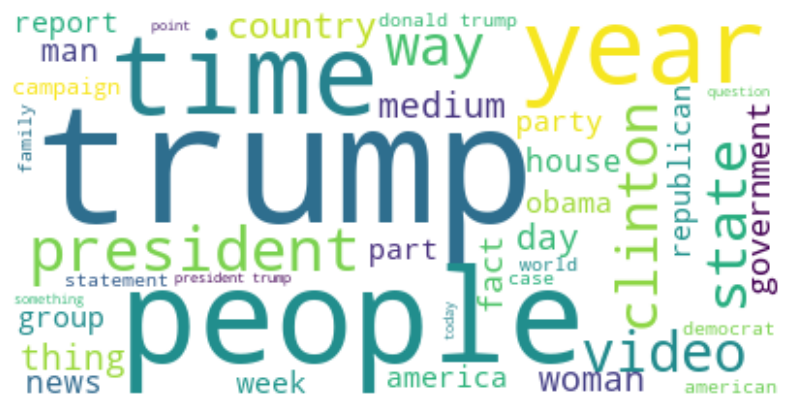

In [57]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [58]:
import nltk
from nltk.util import ngrams
from collections import Counter
from typing import List, Tuple
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rituparna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
# Write a function to get the specified top n-grams


def get_top_ngrams(text: str, n: int = 1, m: int = 10) -> List[Tuple[Tuple[str, ...], int]]:
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Generate n-grams from the tokens
    n_grams = list(ngrams(tokens, n))
    
    # Count the frequency of each n-gram
    counter = Counter(n_grams)
    
    # Return the top m most common n-grams
    return counter.most_common(m)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [60]:
# Handle NaN values in the text data
df_true_news = df_true_news.fillna('')
df_fake_news = df_fake_news.fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

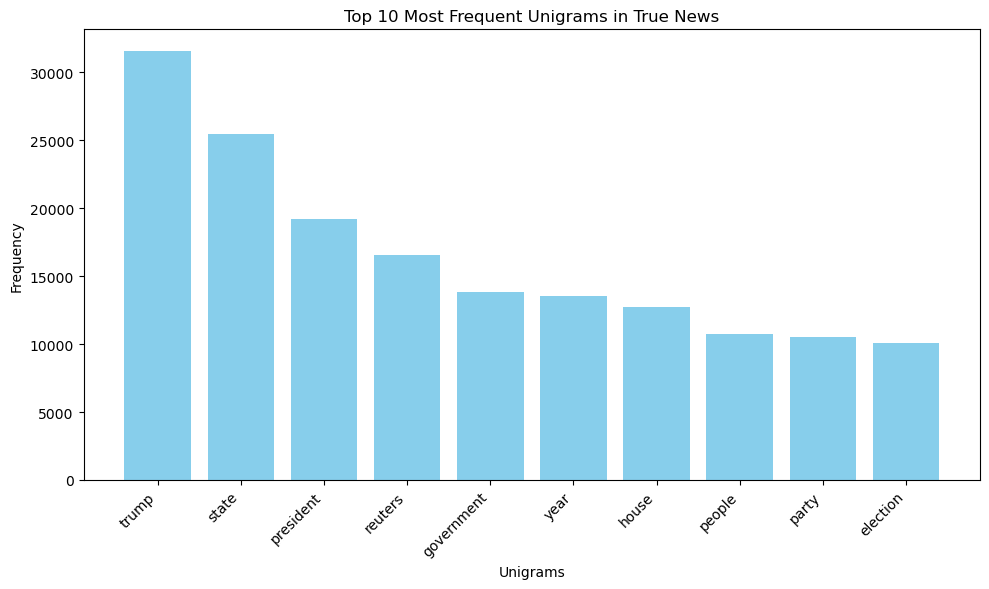

In [61]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_top_10_unigrams = get_top_ngrams(true_text, n=1, m=10)
words = [item[0][0] for item in true_top_10_unigrams]  # Extracting the word from the tuple
counts = [item[1] for item in true_top_10_unigrams]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Frequent Unigrams in True News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



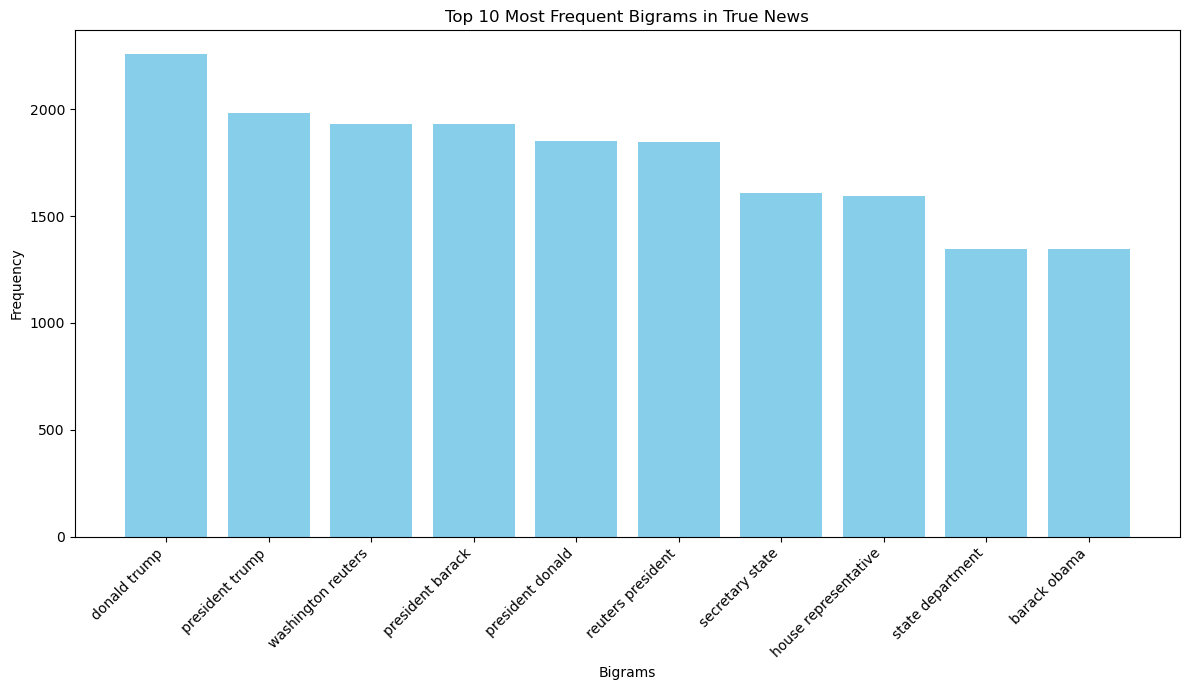

In [62]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_top_10_bigrams = get_top_ngrams(true_text, n=2, m=10)
bigrams = [' '.join(bigram) for bigram, count in true_top_10_bigrams]
counts = [count for bigram, count in true_top_10_bigrams]

plt.figure(figsize=(12, 7))
plt.bar(bigrams, counts, color='skyblue')
plt.title('Top 10 Most Frequent Bigrams in True News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



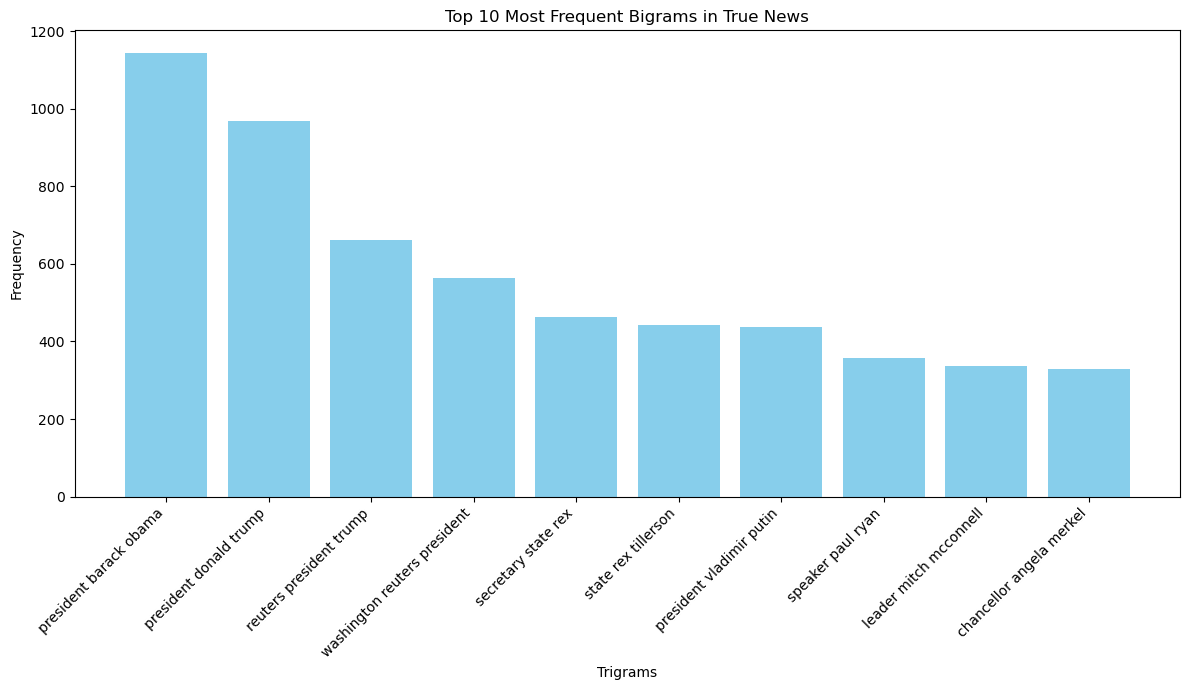

In [63]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_top_10_trigrams = get_top_ngrams(true_text, n=3, m=10)


trigrams = [' '.join(trigram) for trigram, count in true_top_10_trigrams]
counts = [count for trigrams, count in true_top_10_trigrams]

plt.figure(figsize=(12, 7))
plt.bar(trigrams, counts, color='skyblue')
plt.title('Top 10 Most Frequent Bigrams in True News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

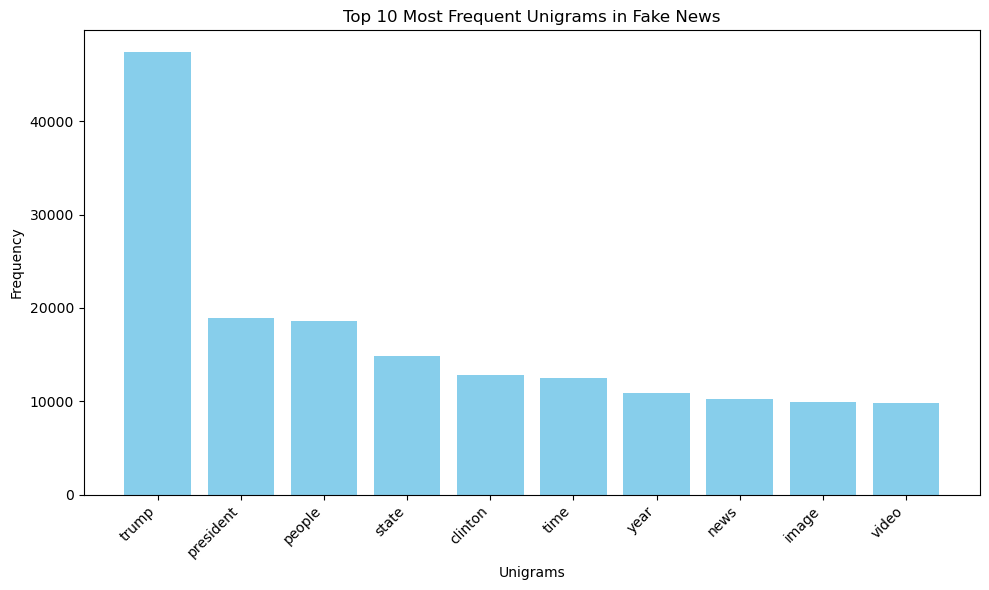

In [64]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_top_10_unigrams = get_top_ngrams(fake_text, n=1, m=10)
words = [item[0][0] for item in fake_top_10_unigrams]  # Extracting the word from the tuple
counts = [item[1] for item in fake_top_10_unigrams]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Frequent Unigrams in Fake News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



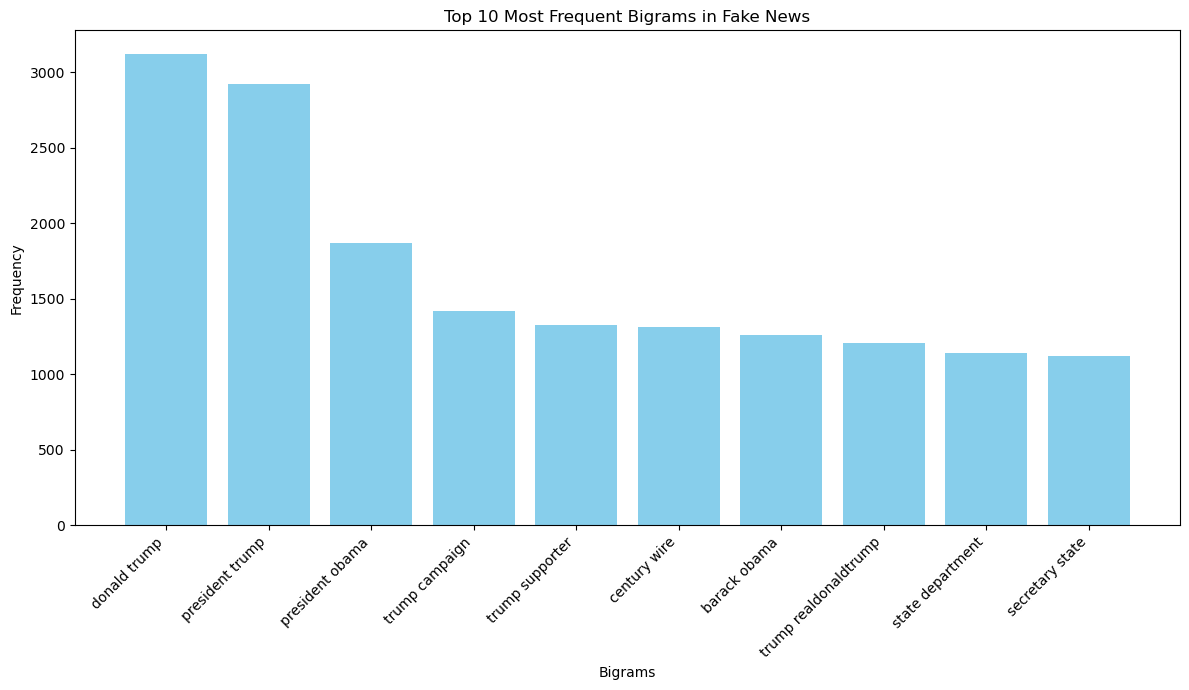

In [65]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_top_10_bigrams = get_top_ngrams(fake_text, n=2, m=10)
bigrams = [' '.join(bigram) for bigram, count in fake_top_10_bigrams]
counts = [count for bigram, count in fake_top_10_bigrams]

plt.figure(figsize=(12, 7))
plt.bar(bigrams, counts, color='skyblue')
plt.title('Top 10 Most Frequent Bigrams in Fake News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



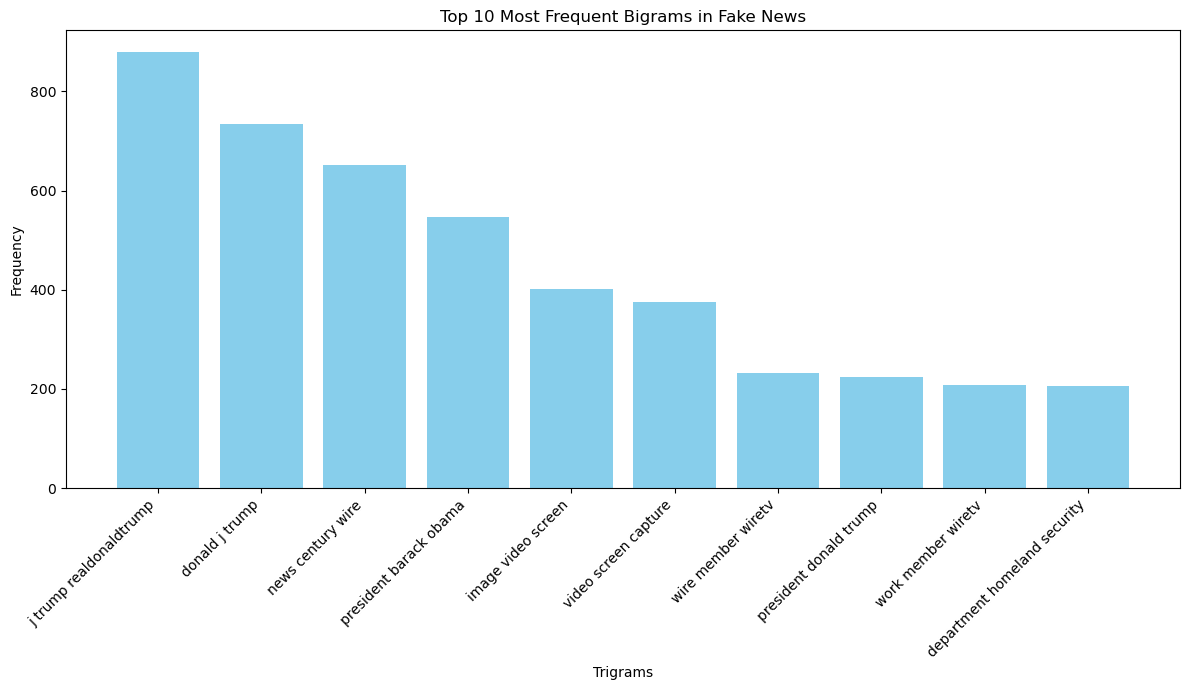

In [66]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_top_10_trigrams = get_top_ngrams(fake_text, n=3, m=10)


trigrams = [' '.join(trigram) for trigram, count in fake_top_10_trigrams]
counts = [count for trigrams, count in fake_top_10_trigrams]

plt.figure(figsize=(12, 7))
plt.bar(trigrams, counts, color='skyblue')
plt.title('Top 10 Most Frequent Bigrams in Fake News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [67]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [68]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [69]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [70]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [71]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [72]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [73]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [74]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [75]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [76]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [77]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [78]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [79]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim
import os

# Assuming the file is in the same directory as your script
model_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [80]:
def get_doc_vector(text_words, model):
   
    # Create a list to hold the vectors for words in the document
    word_vectors = []
    
    # Iterate through each word in the text
    for word in text_words:
        # Check if the word exists in the Word2Vec model's vocabulary
        if word in model.key_to_index:
            # If it exists, get its vector and add it to our list
            word_vectors.append(model[word])
    
    # If the list of word vectors is not empty, compute their average
    if word_vectors:
        # Use np.mean to calculate the average vector along the rows (axis=0)
        return np.mean(word_vectors, axis=0)
    else:
        # If no words were found in the vocabulary, return a vector of zeros
        # The dimension should match the model's vector size (300 in this case)
        return np.zeros(model.vector_size)

In [81]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data


# --- Extract vectors for training data ---
print("\nExtracting vectors for training data...")
if word2vec_model is not None and 'clean_news_text_NN' in df_train.columns:
    # Use the apply() method to process each row of the DataFrame
    # Use the correct column name as specified: 'clean_news_text_NN'
    train_vectors = np.array([get_doc_vector(text, word2vec_model) for text in df_train['clean_news_text_NN']])
    
    # Store the vectors in a new column for the DataFrame (optional but useful)
    df_train['news_vector'] = [vec for vec in train_vectors]
    
    print("Training vectors extracted successfully!")
    print(f"Shape of training vectors: {train_vectors.shape}")
# --- Extract vectors for validation data ---
print("\nExtracting vectors for validation data...")
if word2vec_model is not None and 'clean_news_text_NN' in df_test.columns:
    test_vectors = np.array([get_doc_vector(text, word2vec_model) for text in df_test['clean_news_text_NN']])
    
    df_test['news_vector'] = [vec for vec in test_vectors]
    
    print("Validation vectors extracted successfully!")
    print(f"Shape of validation vectors: {test_vectors.shape}")
## Extract the target variable for the training data and validation data
X_train = np.stack(df_train['news_vector'].values)
y_train = df_train['news_label'].values

# Prepare the validation data in the same way
X_val = np.stack(df_test['news_vector'].values)
y_val = df_test['news_label'].values



Extracting vectors for training data...
Training vectors extracted successfully!
Shape of training vectors: (31428, 300)

Extracting vectors for validation data...
Validation vectors extracted successfully!
Shape of validation vectors: (13470, 300)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [83]:
## Initialise Logistic Regression model
model = LogisticRegression(random_state=42)
## Train Logistic Regression model on training data
model.fit(X_train, y_train)
## Predict on validation data
y_pred = model.predict(X_val)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [84]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_val, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_val, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_val, y_pred)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7173
Precision: 0.7129
Recall: 0.6894
F1-Score: 0.7010


In [85]:
# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_val, y_pred, zero_division=0))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      6996
           1       0.71      0.69      0.70      6474

    accuracy                           0.72     13470
   macro avg       0.72      0.72      0.72     13470
weighted avg       0.72      0.72      0.72     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [86]:
## Initialise Decision Tree model
model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
model.fit(X_train, y_train)
## Predict on validation data
y_pred = model.predict(X_val)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [87]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")


precision = precision_score(y_val, y_pred, zero_division=0)
print(f"Precision: {precision:.4f}")


recall = recall_score(y_val, y_pred, zero_division=0)
print(f"Recall: {recall:.4f}")


f1 = f1_score(y_val, y_pred, zero_division=0)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7097
Precision: 0.7177
Recall: 0.6528
F1-Score: 0.6837


In [88]:
# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_val, y_pred, zero_division=0))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6996
           1       0.72      0.65      0.68      6474

    accuracy                           0.71     13470
   macro avg       0.71      0.71      0.71     13470
weighted avg       0.71      0.71      0.71     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [89]:
## Initialise Random Forest model
model = RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
model.fit(X_train, y_train)
## Predict on validation data
y_pred = model.predict(X_val)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [90]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_val, y_pred, zero_division=0)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_val, y_pred, zero_division=0)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_val, y_pred, zero_division=0)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8021
Precision: 0.8094
Recall: 0.7694
F1-Score: 0.7889


In [91]:
# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_val, y_pred, zero_division=0))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6996
           1       0.81      0.77      0.79      6474

    accuracy                           0.80     13470
   macro avg       0.80      0.80      0.80     13470
weighted avg       0.80      0.80      0.80     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Here we have chosen Semantic Classification where Instead of just counting words, it first transformed the text into meaningful numerical representations called word embeddings using the Word2Vec model.

Observed Patterns in True and Fake News
Semantic classification is particularly effective for this problem because of the distinct linguistic patterns in fake and true news. Fake news often relies on emotionally charged and sensational language, using a more limited and highly specific set of words to evoke a strong response. True news, in contrast, tends to have a more balanced and diverse vocabulary. By using Word2Vec, the model can potentially learn to recognize these underlying patterns and distinguish between the two. The model doesn't just see a word, it "feels" the emotional or contextual weight of the word based on its vector.

Best Model and Evaluation Metric
From the code, the final model I chose was the Random Forest Classifier. This model is an ensemble method that combines multiple decision trees to make a more accurate and stable prediction. Accuracy and F1-Score is highes for Random Forest Classifier compared to other two approches.